# Benchmarking NumPy, ndarray, and RMatrix

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [127]:
def visualize_results(title: str, operation: str, results: list[tuple[str, dict]]):
    """
    Visualize the results of the benchmark tests.
    """
    for label, color, result in results:
        sns.lineplot(x=result[operation]['sizes'], y=result[operation]['times'], label=label, color=color)

    plt.xlabel('n (Matrix is n x x)')
    plt.ylabel('Time (seconds)')
    plt.title(f'Performance Comparison: {title}')

    plt.legend()
    plt.show()

In [128]:
def load_benchmark_results(filename: str) -> dict:
    """
    Load the benchmark results from a json file
    """
    benchmark_results = None
    with open(filename, 'r') as f:
        benchmark_results = json.load(f)
    return benchmark_results

In [129]:
# Loading benchmark results

numpy_results = load_benchmark_results('./benchmark_results/numpy_matrix_results.json')
ndarray_results = load_benchmark_results('./benchmark_results/ndarray_matrix_results.json')
basic_matrix_results = load_benchmark_results('./benchmark_results/basic_matrix_results.json')
one_d_vec_matrix_results = load_benchmark_results('./benchmark_results/one_d_vec_matrix_results.json')
blocked_matrix_results = load_benchmark_results('./benchmark_results/blocked_matrix_results.json')
transposed_view_matrix_results = load_benchmark_results('./benchmark_results/transposed_view_matrix_results.json')
blas_matrix_results = load_benchmark_results('./benchmark_results/blas_matrix_results.json')
multithread_matrix_results = load_benchmark_results('./benchmark_results/multithread_matrix_results.json')

results = [
    ('Numpy', 'blue', numpy_results),
    ('Ndarray', 'orange', ndarray_results),
    ('BLAS', 'pink', blas_matrix_results),
    ('2D Vec', 'green', basic_matrix_results),
    ('1D Vec', 'red', one_d_vec_matrix_results),
    ('Blocking', 'purple', blocked_matrix_results),
    ('Transposed', 'brown', transposed_view_matrix_results),
    ('Multithread', 'gray', multithread_matrix_results)
]

In [130]:
### Computing speed up of BLAS matrix vs Ndarray.
blas_matrix_results['matrix_multiplication']['times']
ndarray_results['matrix_multiplication']['times']

speedup = [(abs(b - n) / n) * 100 for b, n in zip(blas_matrix_results['matrix_multiplication']['times'], ndarray_results['matrix_multiplication']['times'])]
avg_speedup = sum(speedup) / len(speedup)
print(f"Average speedup of BLAS matrix vs Ndarray: {avg_speedup:.2f}%")

Average speedup of BLAS matrix vs Ndarray: 85.21%


## Matrix Multiplication

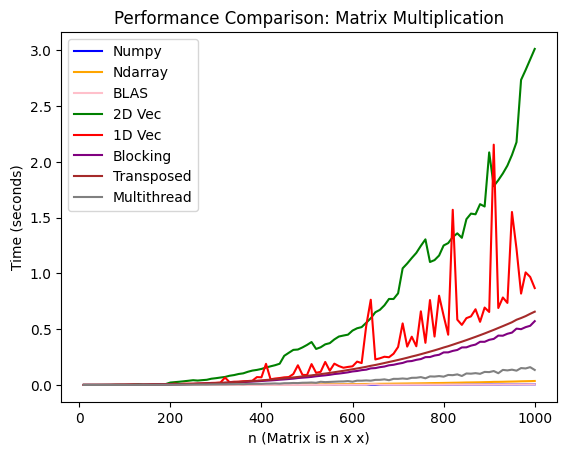

In [131]:
visualize_results('Matrix Multiplication', 'matrix_multiplication', results)

## Addition

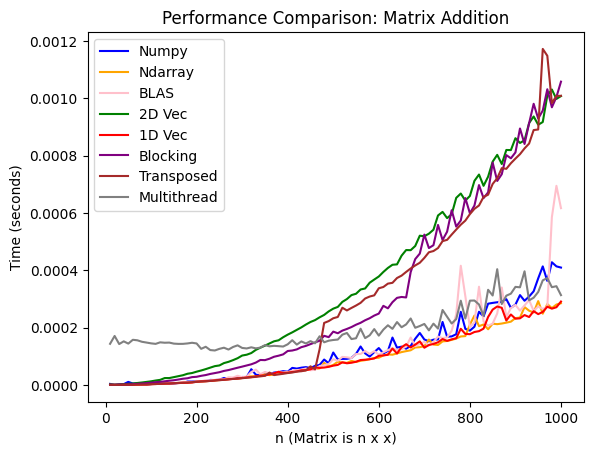

In [132]:
visualize_results('Matrix Addition', 'matrix_addition', results)

## Subtraction

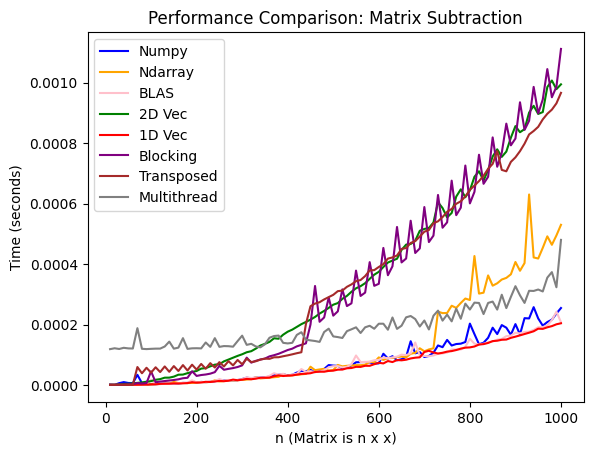

In [133]:
visualize_results('Matrix Subtraction', 'matrix_subtraction', results)

## Scalar Multiplication

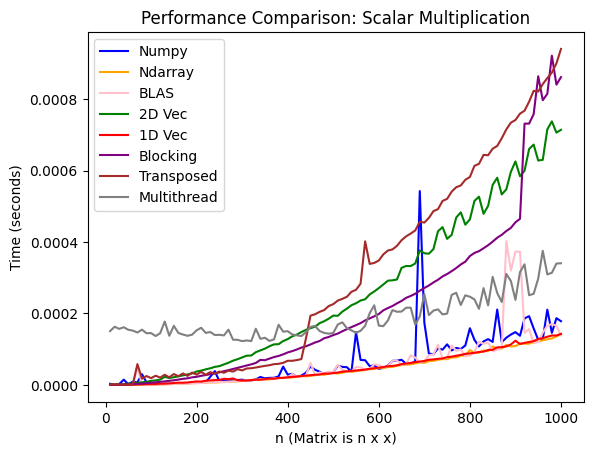

In [134]:
visualize_results('Scalar Multiplication', 'scalar_multiplication', results)